In [8]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data from your results ---
s3_metrics = {
    "hit_rate": 0.833333,
    "avg_rank": 5.0,
    "recall@5": 0.000152,
    "ndcg@5": 0.013121,
    "hhi": 0.1,
    "entropy": 3.321928,
    "gini": 0.434921
}

s7_metrics = {
    "hit_rate": 0.714286,
    "avg_rank": 2.888889,
    "recall@5": 0.005875,
    "ndcg@5": 0.166221,
    "hhi": 0.470408,
    "entropy": 1.493030,
    "gini": 0.052743
}

s3_system = {
    "entropy": 3.321928,
    "system_entropy": 3.321928,  # same as avg for demo
    "system_gini": 0.434921
}

s7_system = {
    "entropy": 1.493030,
    "system_entropy": 4.643856,
    "system_gini": 0.052743
}


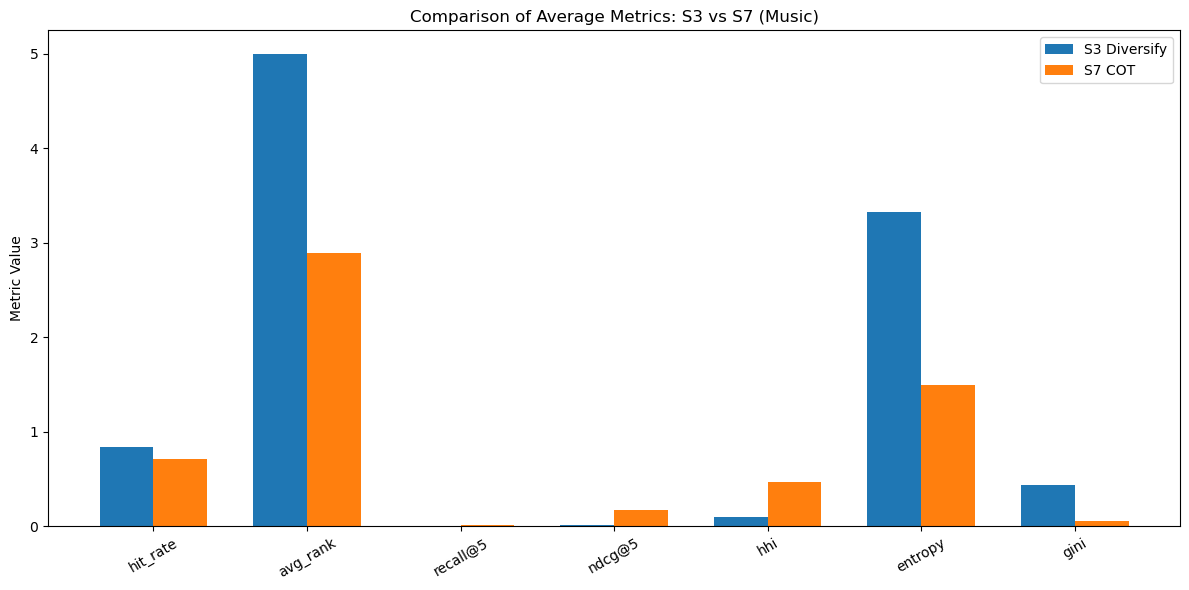

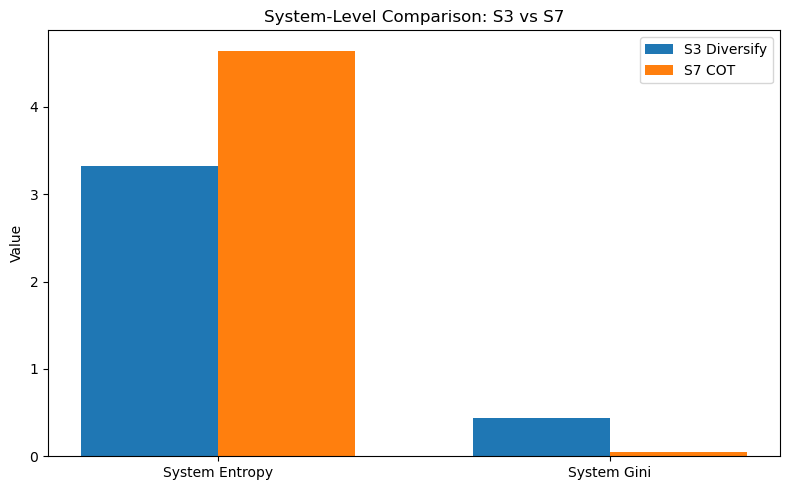

In [2]:
# --- Plot average metrics ---
metrics_names = list(s3_metrics.keys())
s3_values = [s3_metrics[m] for m in metrics_names]
s7_values = [s7_metrics[m] for m in metrics_names]

x = np.arange(len(metrics_names))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, s3_values, width, label="S3 Diversify")
plt.bar(x + width/2, s7_values, width, label="S7 COT")

plt.xticks(x, metrics_names, rotation=30)
plt.ylabel("Metric Value")
plt.title("Comparison of Average Metrics: S3 vs S7 (Music)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot system-level entropy and gini ---
labels = ["System Entropy", "System Gini"]
s3_sys = [s3_system["system_entropy"], s3_system["system_gini"]]
s7_sys = [s7_system["system_entropy"], s7_system["system_gini"]]

x = np.arange(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, s3_sys, width, label="S3 Diversify")
plt.bar(x + width/2, s7_sys, width, label="S7 COT")

plt.xticks(x, labels)
plt.ylabel("Value")
plt.title("System-Level Comparison: S3 vs S7")
plt.legend()
plt.tight_layout()
plt.show()

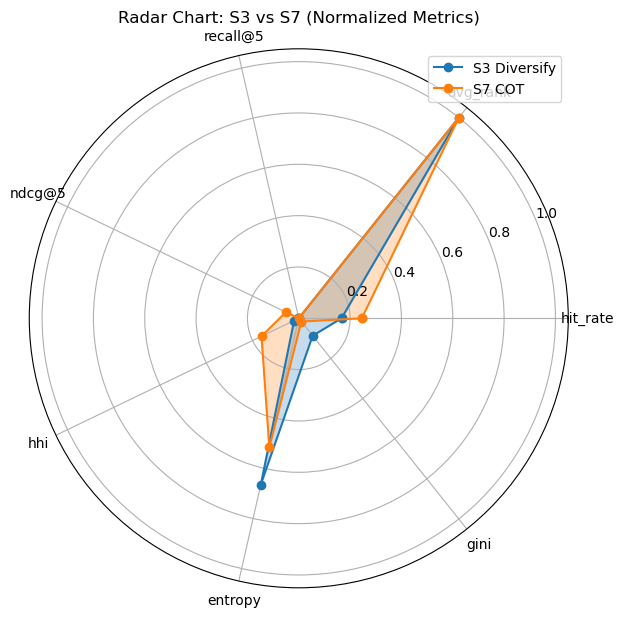

In [5]:
# Normalize metrics (so all fit into 0-1 range for radar chart)
def normalize(values):
    min_val = min(values)
    max_val = max(values)
    return [(v - min_val) / (max_val - min_val) if max_val != min_val else 0 for v in values]

metrics = ["hit_rate", "avg_rank", "recall@5", "ndcg@5", "hhi", "entropy", "gini"]
s3_values = [s3_metrics[m] for m in metrics]
s7_values = [s7_metrics[m] for m in metrics]

s3_norm = normalize(s3_values)
s7_norm = normalize(s7_values)

# Radar setup
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # close circle

s3_norm += s3_norm[:1]
s7_norm += s7_norm[:1]

fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))
ax.plot(angles, s3_norm, 'o-', label="S3 Diversify")
ax.fill(angles, s3_norm, alpha=0.25)

ax.plot(angles, s7_norm, 'o-', label="S7 COT")
ax.fill(angles, s7_norm, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
plt.title("Radar Chart: S3 vs S7 (Normalized Metrics)")
plt.legend()
plt.show()


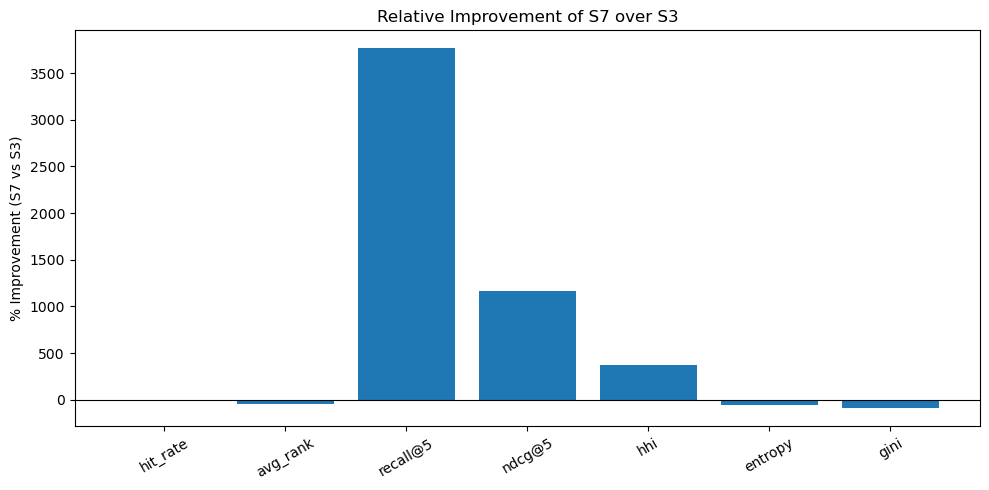

In [6]:
improvement = {}
for m in metrics:
    s3_val, s7_val = s3_metrics[m], s7_metrics[m]
    if s3_val != 0:
        improvement[m] = ((s7_val - s3_val) / abs(s3_val)) * 100
    else:
        improvement[m] = 0

plt.figure(figsize=(10,5))
plt.bar(improvement.keys(), improvement.values())
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=30)
plt.ylabel("% Improvement (S7 vs S3)")
plt.title("Relative Improvement of S7 over S3")
plt.tight_layout()
plt.show()


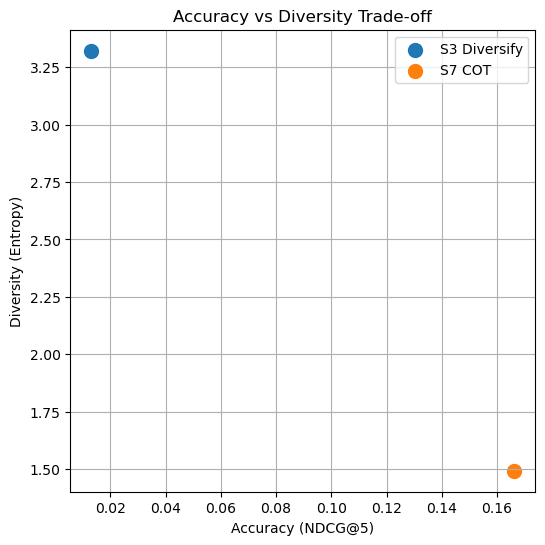

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(s3_metrics["ndcg@5"], s3_metrics["entropy"], label="S3 Diversify", s=100)
plt.scatter(s7_metrics["ndcg@5"], s7_metrics["entropy"], label="S7 COT", s=100)

plt.xlabel("Accuracy (NDCG@5)")
plt.ylabel("Diversity (Entropy)")
plt.title("Accuracy vs Diversity Trade-off")
plt.legend()
plt.grid(True)
plt.show()
